In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec

plt.style.use('seaborn-white')
sns.set(style = 'white', font_scale = 1.53)

def save(name):
    plt.savefig('C:\\Users\\KNITISH\\Documents\\Articles\\'+name+'.png', dpi = 150, bbox_inches = 'tight')

### Business EDA

<ipython-input-3-07aae0ea44a4>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('C:\\Users\\KNITISH\\Documents\\Articles\\'+name+'.png', dpi = 150, tight_layout = True)


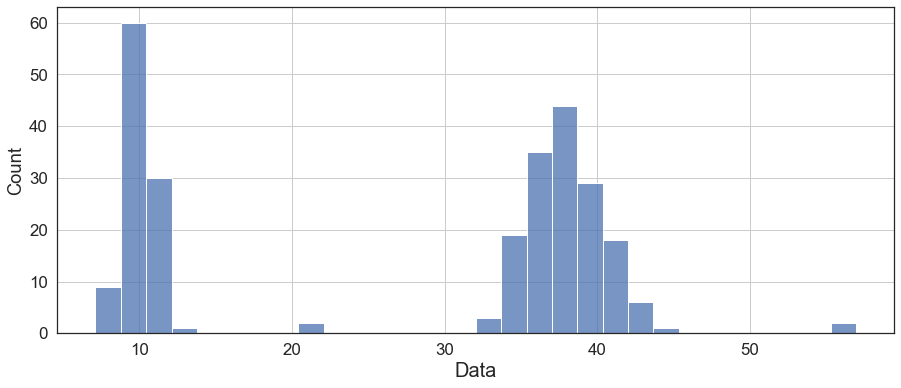

In [4]:
gau1 = np.random.normal(10, 1, (100, 1))
gau2 = np.random.normal(38, 2, (155, 1))
outliers = np.array([[22], [22], [56], [57]])
bdata  =  np.concatenate([gau1, gau2, outliers], axis = 0)

plt.figure(figsize = (15, 6))
sns.histplot(bdata, kde = False, bins = 30, legend = False)
plt.grid()
plt.xlabel('Data', fontsize = 20)

save('Business EDA')

<ipython-input-3-07aae0ea44a4>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('C:\\Users\\KNITISH\\Documents\\Articles\\'+name+'.png', dpi = 150, tight_layout = True)


<Figure size 1080x432 with 0 Axes>

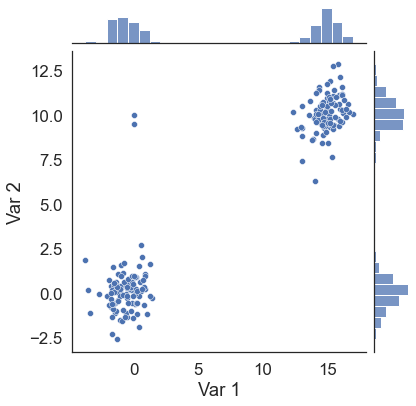

In [30]:
'''gau1 = np.random.normal(10, 1, (100, 1))
gau2 = np.random.normal(38, 2, (100, 1))'''
d1 = np.random.multivariate_normal(mean = np.array([-.5, 0]),
                               cov = np.array([[1, 0], [0, 1]]), size = 100)


d2 = np.random.multivariate_normal(mean = np.array([15, 10]),
                               cov = np.array([[1, 0.3], [.3, 1]]), size = 100)

outliers = np.array([[0, 10],[0, 9.5]])
d = pd.DataFrame(np.concatenate([d1, d2, outliers], axis = 0), columns = ['Var 1', 'Var 2'])

plt.figure(figsize = (15, 6))
#plt.scatter(d[:, 0], d[:, 1])
sns.jointplot(data = d, x = 'Var 1', y = 'Var 2', marginal_kws = {'bins': 25}, ratio = 7)
#plt.grid()
plt.xlabel('Var 1', fontsize = 20)
plt.ylabel('Var 2', fontsize = 20)
save('Business EDA_scatter')

## Univariate Methods

In [45]:
x = np.random.normal(10, 1, (100, ))
x[0] = 0
x[1] = 1
#tukey(x)

In [42]:
def tukey(x, k = 1.5):
    x = np.array(x).copy().astype(float)
    first_quartile = np.quantile(x, .25)
    third_quartile = np.quantile(x, .75)
    
    # Define IQR
    iqr = third_quartile - first_quartile
    
    ### Define the allowed limits for 'Normal Data'
    lower_allowed_limit = first_quartile - (k * iqr)
    upper_allowed_limit = third_quartile + (k * iqr)
    
    # set values below the lower limit or above the upper limit as nan
    x[(x<lower_allowed_limit) | (x>upper_allowed_limit)] = np.nan
    return x
    

<ipython-input-3-07aae0ea44a4>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('C:\\Users\\KNITISH\\Documents\\Articles\\'+name+'.png', dpi = 150, tight_layout = True)


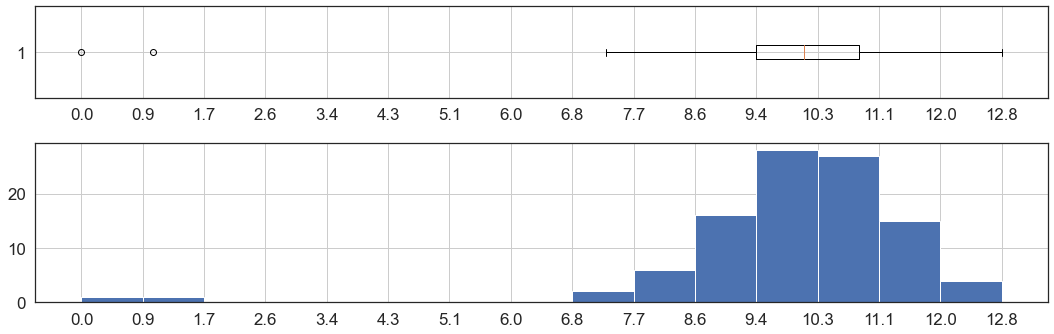

In [68]:

fig = plt.figure(figsize = (15, 5),tight_layout = True)
grid = gridspec.GridSpec(5, 6)

ax1 = fig.add_subplot(grid[2:, :])
n, bins, patches = ax1.hist(x, bins = 15)
ax1.set_xticks(bins)
ax1.set_xticklabels(np.around(bins, 1))
ax1.grid()

ax2 = fig.add_subplot(grid[:2, :])
ax2.boxplot(x, vert = False, whis = 1.5)
ax2.set_xticks(bins)
ax2.set_xticklabels(np.around(bins, 1))
ax2.grid()
save('tukey')

### Mahalanobos Distance

In [70]:
from sklearn import covariance



<ipython-input-3-07aae0ea44a4>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('C:\\Users\\KNITISH\\Documents\\Articles\\'+name+'.png', dpi = 150, tight_layout = True)


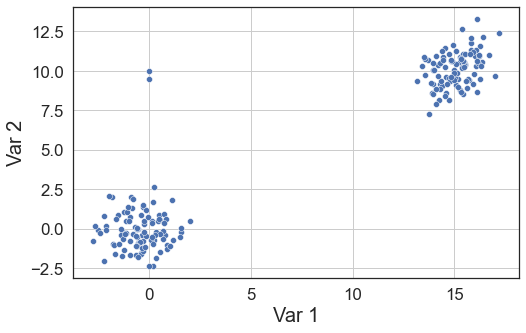

In [99]:
d1 = np.random.multivariate_normal(mean = np.array([-.5, 0]),
                               cov = np.array([[1, 0], [0, 1]]), size = 100)


d2 = np.random.multivariate_normal(mean = np.array([15, 10]),
                               cov = np.array([[1, 0.3], [.3, 1]]), size = 100)

outliers = np.array([[0, 10],[0, 9.5]])
d = pd.DataFrame(np.concatenate([d1, d2, outliers], axis = 0), columns = ['Var 1', 'Var 2'])

plt.figure(figsize = (8,5))
#plt.scatter(d[:, 0], d[:, 1])
#sns.jointplot(data = d, x = 'Var 1', y = 'Var 2', marginal_kws = {'bins': 25}, ratio = 7)
sns.scatterplot(data = d, x = 'Var 1', y = 'Var 2')
plt.grid()
plt.xlabel('Var 1', fontsize = 20)
plt.ylabel('Var 2', fontsize = 20)
save('MD Scenario')

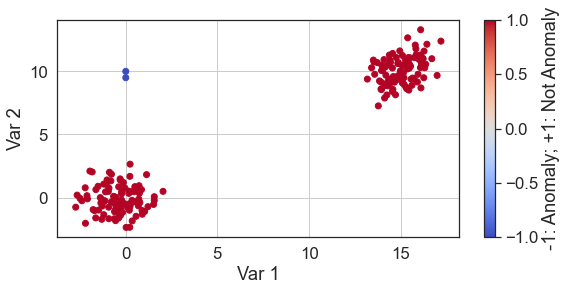

In [105]:
el = covariance.EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=0.0075, random_state=0)
# Fit the data
el.fit(d)

# Create column that shows anomaly status
d['Anomaly or Not'] = el.predict(d)

# Create scatterplot and color the anomalies differently
plt.figure(figsize = (9, 4))
ax = plt.scatter(d['Var 1'], d['Var 2'], c = d['Anomaly or Not'], cmap = 'coolwarm')
#ax = sns.scatterplot(d['Var 1'], d['Var 2'], c = d['Anomaly or Not'])
plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')
plt.grid()
save('MD_regular')

##### As a function of Contamination

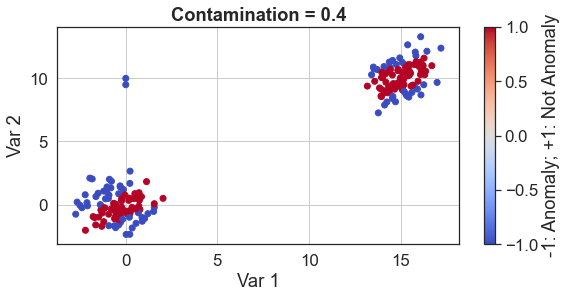

In [120]:
contamination = .4
el = covariance.EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=contamination, random_state=0)
# Fit the data
el.fit(d)

# Create column that shows anomaly status
d['Anomaly or Not'] = el.predict(d)

# Create scatterplot and color the anomalies differently
plt.figure(figsize = (9, 4))
ax = plt.scatter(d['Var 1'], d['Var 2'], c = d['Anomaly or Not'], cmap = 'coolwarm')
plt.title('Contamination = ' + str(contamination), weight = 'bold')
#ax = sns.scatterplot(d['Var 1'], d['Var 2'], c = d['Anomaly or Not'])
plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')
plt.grid()
save('MD_regular_'+str(contamination))

### Using the actual Distance

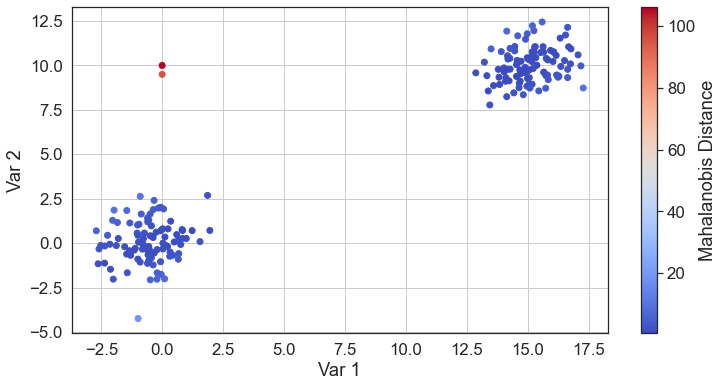

In [130]:
d1 = np.random.multivariate_normal(mean = np.array([-.5, 0]),
                               cov = np.array([[1, 0], [0, 1]]), size = 100)


d2 = np.random.multivariate_normal(mean = np.array([15, 10]),
                               cov = np.array([[1, 0.3], [.3, 1]]), size = 100)

outliers = np.array([[0, 10],[0, 9.5]])
d = pd.DataFrame(np.concatenate([d1, d2, outliers], axis = 0), columns = ['Var 1', 'Var 2'])


contamination = .4 # We can set any value here as we will now use our own threshold
el = covariance.EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=contamination, random_state=0)
# Fit the data
el.fit(d)

# Create column that shows anomaly status
d['Mahalanobis Distance'] = el.mahalanobis(d)

# Create scatterplot and color the anomalies differently
plt.figure(figsize = (12, 6))
ax = plt.scatter(d['Var 1'], d['Var 2'], c = d['Mahalanobis Distance'], cmap = 'coolwarm')
#plt.title('Contamination = Does not matter for this method', weight = 'bold')
#ax = sns.scatterplot(d['Var 1'], d['Var 2'], c = d['Anomaly or Not'])
plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.colorbar(label = 'Mahalanobis Distance')
plt.grid()
save('No_Contamination_MD_regular_'+str(contamination))

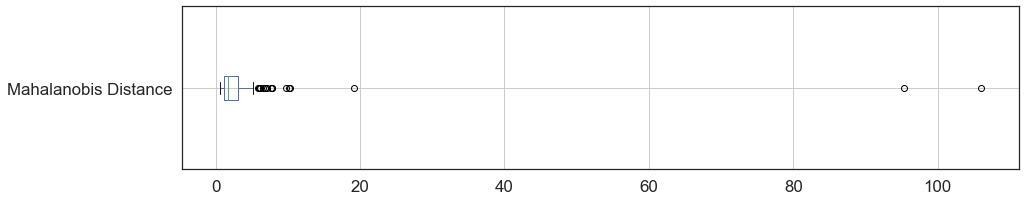

In [142]:
d['Mahalanobis Distance'].plot.box(figsize = (15, 3),grid = True, vert = False)
save('MB_Box')

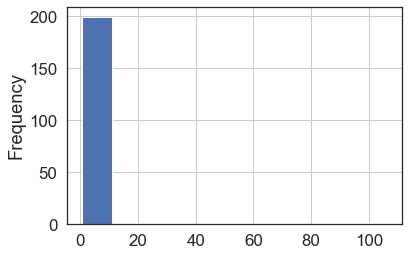

In [137]:
d['Mahalanobis Distance'].plot.hist(grid = True)
save('MB_Hist')